In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import tree

In [4]:
data = pd.read_csv('EnglishSpam.csv' ,sep="\t",header=None)
data=data.rename(columns = {0:'label',1:'message'})
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

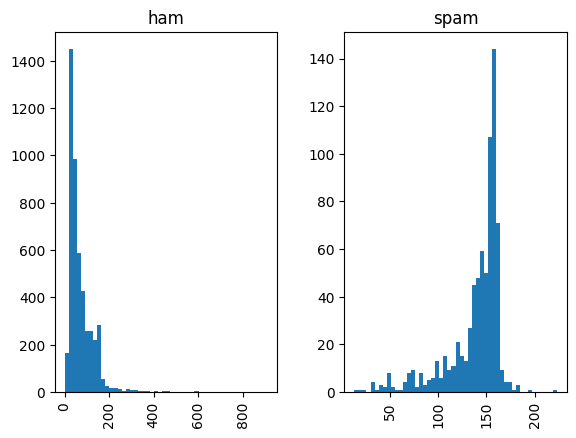

In [9]:
data['length'] = data['message'].map(lambda text: len(text))
data.hist(column='length', by='label', bins=50)

In [10]:
data['spam'] = data['label'].apply(lambda x: 1 if x == 'spam' else 0)
data

,label,message,length,spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,1
5568,ham,Will ü b going to esplanade fr home?,36,0
5569,ham,"Pity, * was in mood for that. So...any other s...",57,0
5570,ham,The guy did some bitching but I acted like i'd...,125,0


In [11]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(data.message, data.spam, test_size = 0.30)

In [12]:
x_train

1124                  Good morning princess! How are you?
2308    WIN a year supply of CDs 4 a store of ur choic...
2377    I'm on my way home. Went to change batt 4 my w...
2663    Hello darling how are you today? I would love ...
3911    She.s good. She was wondering if you wont say ...
                              ...                        
3643    My house here e sky quite dark liao... If rain...
763     Urgent Ur £500 guaranteed award is still uncla...
4091    We tried to call you re your reply to our sms ...
174     Bloody hell, cant believe you forgot my surnam...
4624    U need my presnts always bcz U cant mis love. ...
Name: message, Length: 3900, dtype: object

In [13]:
x_train.describe()

count                       3900
unique                      3673
top       Sorry, I'll call later
freq                          19
Name: message, dtype: object

In [14]:
## can also be used tfidf vectorizer instead of countvectorizer
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)

In [15]:
x_train_count

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51969 stored elements and shape (3900, 7169)>

In [16]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
# train model
model = MultinomialNB()
model.fit(x_train_count, y_train)

MultinomialNB()

In [18]:
#test model
x_test_count = cv.transform(x_test)
model.score(x_test_count, y_test)

0.986244019138756

In [19]:
predicted=model.predict(x_test_count)

In [20]:
predicted

array([1, 1, 0, ..., 0, 0, 0])

In [21]:
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1460
           1       0.97      0.92      0.94       212

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



Confusion Matrix:
[[ 194   18]
 [   5 1455]]


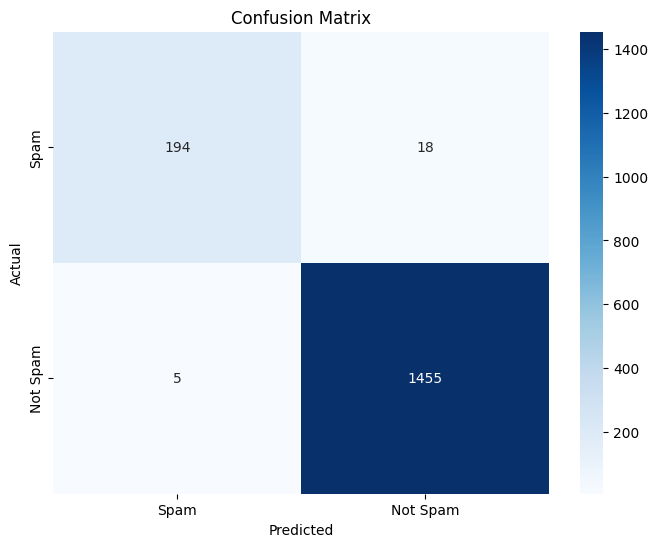

In [28]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, predicted, labels=[1, 0])

# Print confusion matrix
print("Confusion Matrix:")
print(cm)



import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Not Spam'], yticklabels=['Spam', 'Not Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Test the Result with different email.

In [29]:
email_ham = ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']
email_ham_count = cv.transform(email_ham)
model.predict(email_ham_count)

array([0])

In [30]:
email_spam = ['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&Cs apply 08452810075over18s']
email_spam_count = cv.transform(email_spam)
model.predict(email_spam_count)

array([1])

In [31]:
email_ham = ['hey wanna meet up for the game?']
email_ham_count = cv.transform(email_ham)
model.predict(email_ham_count)

array([0])

In [32]:
email_spam = ['reward money click']
email_spam_count = cv.transform(email_spam)
model.predict(email_spam_count)

array([1])